Column names in the dataset: Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images'],
      dtype='object')
Missing values in each column:
 Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value            

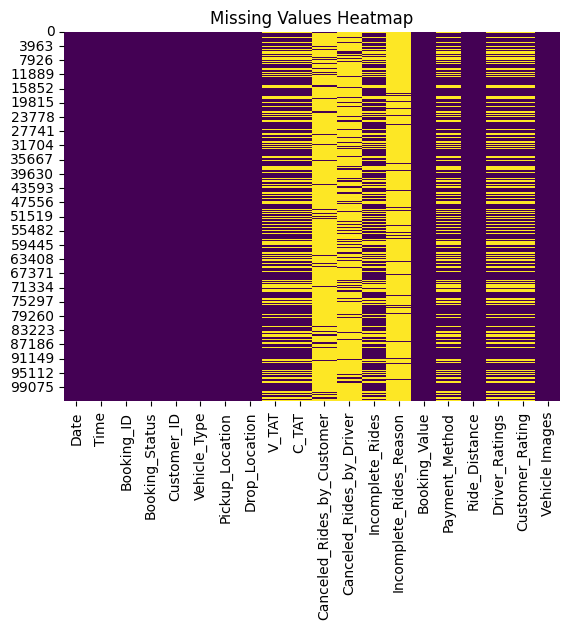

Column 'Booking_Date' not found in the dataset.
Column 'Price' not found in the dataset.


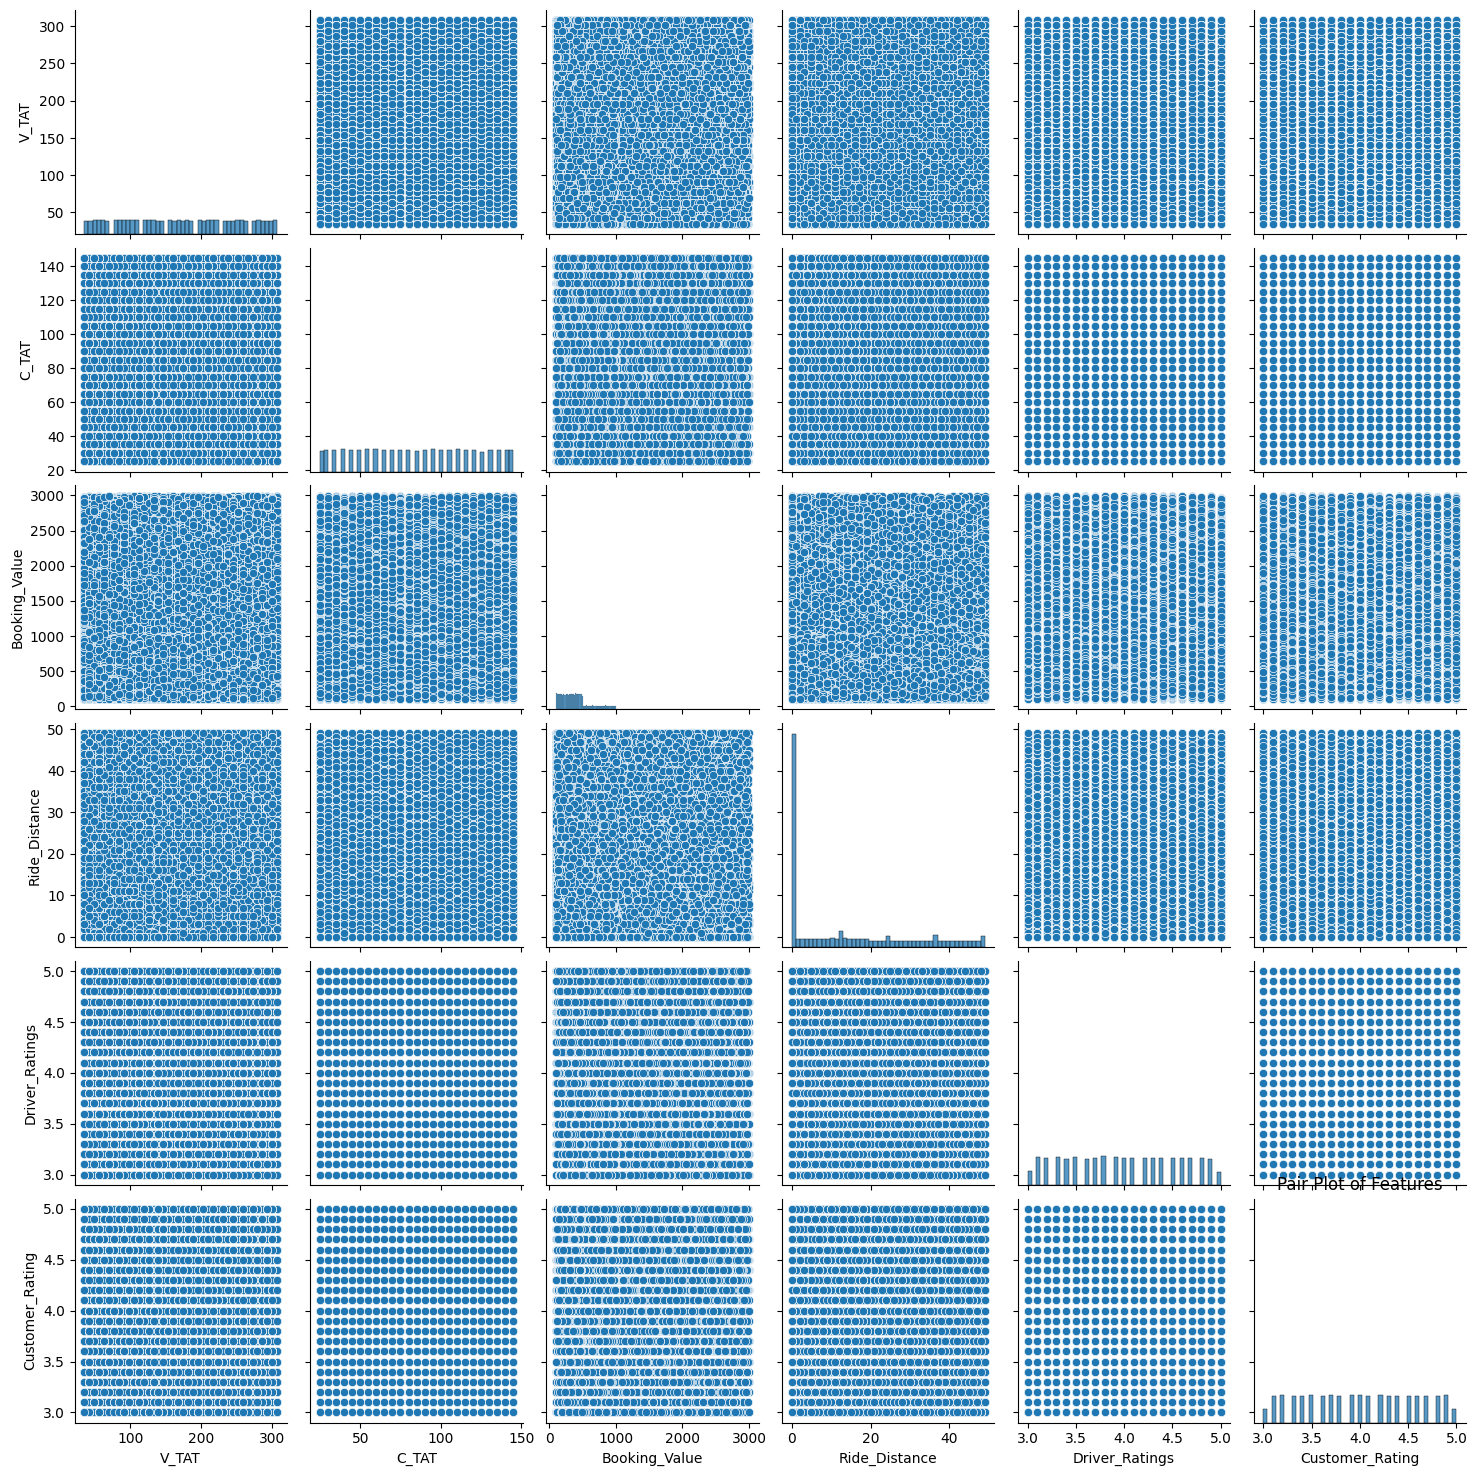

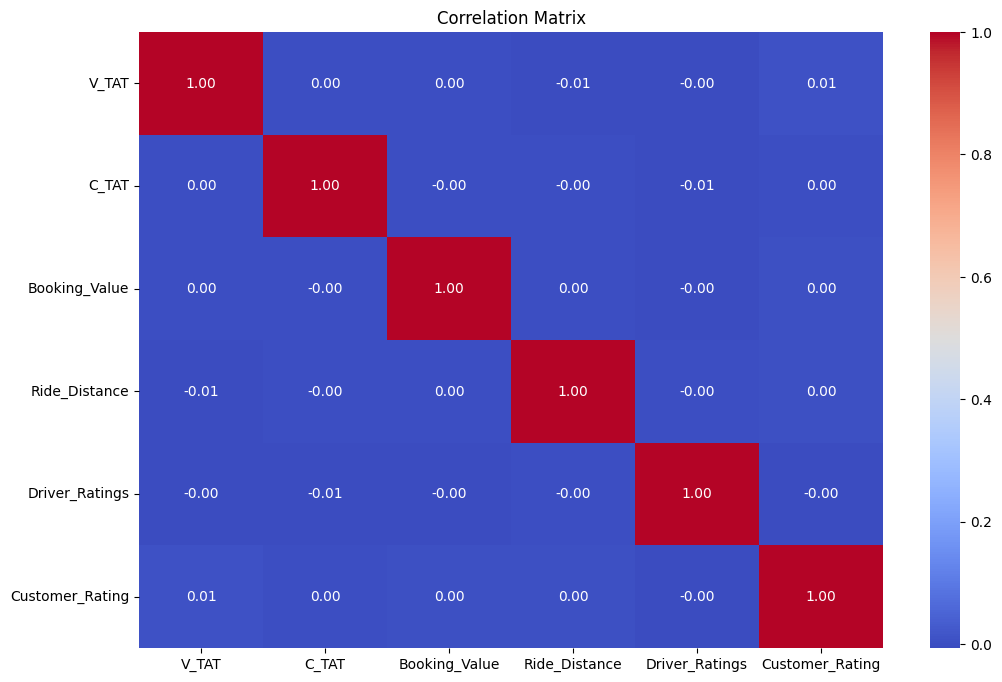

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_excel('Bookings.xlsx')

# Check the column names
print("Column names in the dataset:", data.columns)

# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Impute missing values using forward fill
data.ffill(inplace=True)  # Use ffill directly

# Convert data types
if 'Booking_Date' in data.columns:
    data['Booking_Date'] = pd.to_datetime(data['Booking_Date'])
else:
    print("Column 'Booking_Date' not found in the dataset.")

# Outlier detection and handling
if 'Price' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Price'])  # Ensure 'Price' column exists
    plt.title('Boxplot of Price to Identify Outliers')
    plt.show()
else:
    print("Column 'Price' not found in the dataset.")

# Feature extraction
if 'Booking_Date' in data.columns:
    data['Booking_Year'] = data['Booking_Date'].dt.year
    data['Booking_Month'] = data['Booking_Date'].dt.month
    data['Day_of_Week'] = data['Booking_Date'].dt.day_name()

# Categorical encoding
if 'Category' in data.columns:
    data = pd.get_dummies(data, columns=['Category'], drop_first=True)

# Visualization
# Pair plot
sns.pairplot(data)
plt.title('Pair Plot of Features')
plt.show()

# Correlation matrix
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time series analysis (if applicable)
if 'Booking_Date' in data.columns:
    data.set_index('Booking_Date', inplace=True)
    if 'Price' in data.columns:
        data['Price'].resample('M').mean().plot()
        plt.title('Average Price Over Time')
        plt.xlabel('Date')
        plt.ylabel('Average Price')
        plt.show()
    else:
        print("Column 'Price' not found for time series analysis.")

# Export cleaned data to CSV
data.to_csv('Cleaned_Bookings_Enhanced.csv', index=False)
